In [4]:
a = [1, 2, 3, 4, 5]
a[9:11]

[]

In [8]:
import torch
a = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=torch.float32)
torch.mean(a, dim=0)

tensor([4., 5., 6.])

In [16]:
from textwrap import dedent

s = """\
    def play():
      print('play')
    """
print(dedent(s))

def play():
  print('play')



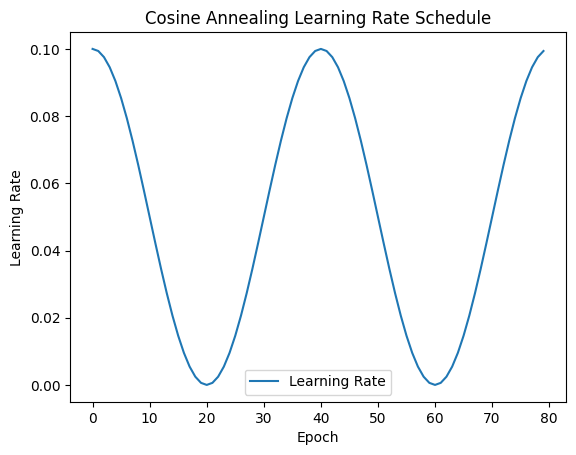

In [3]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingLR

# 定义一个简单的优化器
model = torch.nn.Linear(10, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 初始学习率0.1

# 设置CosineAnnealingLR调度器
epoch = 20  # 总epoch数作为T_max
k = 4
scheduler = CosineAnnealingLR(optimizer, T_max=epoch)

# 记录学习率变化
lr_history = []
for e in range(k * epoch):
    # 模拟训练一步
    optimizer.step()
    lr_history.append(optimizer.param_groups[0]['lr'])
    # 更新学习率
    scheduler.step()

# 可视化学习率变化
plt.plot(range(k*epoch), lr_history, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Cosine Annealing Learning Rate Schedule')
plt.legend()
plt.show()

In [34]:
import pandas as pd
from utils.common import load_txt_file

vocab_path = './data/vocab_val.txt'
min_freq = 350
stop_word_paths = ["stopwords/baidu_stopwords.txt",
                   "stopwords/hit_stopwords.txt"]

stop_word = set()
for _path in stop_word_paths:
    stop_word.update(load_txt_file(_path))


def load_vocab(vocab_path: str):
    words: list[str] = []
    freqs: list[int] = []
    with open(vocab_path, 'r') as f:
        for line in f:
            if line.strip() == '':
                continue

            word, freq = line.rsplit(' ', 1)
            int_freq = int(freq)
            if word not in stop_word and int_freq >= min_freq:
                words.append(word)
                freqs.append(int_freq)

    return pd.DataFrame({'word': words, 'freq': freqs})


vocab_df = load_vocab(vocab_path)

In [45]:
import numpy as np

min_freq = 350
t = 1e-3
total_words = vocab_df['freq'].sum()
vocab_df['prob'] = vocab_df['freq'] / total_words
vocab_df['keep_prob'] = 1.0 - np.sqrt(t / vocab_df['prob'])
vocab_df['keep_prob'] = np.where(
    vocab_df['keep_prob'] < 0.0, 1.0, vocab_df['keep_prob'])
vocab_df['keep_prob'][:92]

0     0.888533
1     0.881040
2     0.593912
3     0.531439
4     0.510234
        ...   
87    0.018116
88    0.012980
89    0.008769
90    0.002191
91    1.000000
Name: keep_prob, Length: 92, dtype: float64

In [6]:
indices = [1, 2, 3, 4, 5]
window_size = 8

result = []
for i, target_index in enumerate(indices):
    context = indices[max(0, i - window_size):i] + \
        indices[i + 1:i + window_size + 1]
    if context:
        result.append((context, target_index))
result

[([2, 3, 4, 5], 1),
 ([1, 3, 4, 5], 2),
 ([1, 2, 4, 5], 3),
 ([1, 2, 3, 5], 4),
 ([1, 2, 3, 4], 5)]

In [7]:
import torch.nn as nn
import torch

embedding = nn.Embedding(10, 10, padding_idx=1)
indice = torch.tensor([1, 2])
embeddings = embedding(indice)
print(embeddings[0])
print(embeddings[1])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SelectBackward0>)
tensor([ 0.2310, -0.1015, -0.2574,  0.3378,  0.8157,  0.5761,  0.9994,  0.3709,
         0.4556,  1.3753], grad_fn=<SelectBackward0>)
